In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [2]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [3]:
import pandas as pd
from pandas import Series, DataFrame

from pandas_datareader import data
from pandas.tseries.offsets import Day, MonthEnd
import numpy as np
import sys
from scipy.stats import rankdata
import FinanceDataReader as fdr
from tqdm import tqdm_notebook

In [4]:
import os
os.getcwd()

'C:\\python\\jupyter'

In [5]:
goldTR = pd.read_excel('../data/goldTr.xls', 'sheet1', index_col=0, na_values=['NA'])

In [6]:
oilER = pd.read_excel('../data/oilER.xls', 'sheet1', index_col=0, na_values=['NA'])

In [7]:
kospi200 = pd.read_excel('../data/KOSPI 200.xlsx', 'sheet1', index_col=0, na_values=['NA'])

In [8]:
snp500 = pd.read_excel('../data/snp.xls', 'sheet1', index_col=0, na_values=['NA'])

In [9]:
sp국채10선물 = pd.read_excel('../data/sp국채10선물.xls', 'sheet1', index_col=0, na_values=['NA'])

In [10]:
nasdaq100 = pd.read_excel('../data/Nasdaq 100.xlsx', 'sheet1', index_col=0, na_values=['NA'])

In [11]:
kosdaq150 = pd.read_excel('../data/KOSDAQ 150 Historical Data.xlsx', 'sheet1', index_col=0, na_values=['NA'])

In [15]:
국채레버리지 = pd.read_excel('../data/KOSEF_국고채10년레버리지.xls', 'sheet1', index_col=0, na_values=['NA'])

In [16]:
ticker = ['snp500', 'nasdaq100', '국채레버리지', 'sp국채10선물', 'goldTR', 'oilER']

In [17]:
port = kospi200.join(kosdaq150, how='outer')

In [18]:
port = port.join(snp500, how='outer')

In [19]:
port = port.join(nasdaq100, how='outer')

In [20]:
port = port.join(국채레버리지, how='outer')

In [21]:
port = port.join(sp국채10선물, how='outer')

In [22]:
port = port.join(goldTR, how='outer')

In [23]:
port = port.join(oilER, how='outer')

In [25]:
From = '2016-01-04'
To = '2019-02-08'

In [26]:
port = port.loc[From:To,:]

In [27]:
port = port.fillna(method = 'ffill')

In [28]:
port.rename(columns={"S&P 10-Year U.S. Treasury Note Futures Total Return Index": "S&P 10-Year Treasury"}, inplace=True)

In [29]:
port.columns

Index(['KOSPI 200', 'kOSDAQ 150', 'S&P 500', 'Price', 'KOSEF국고채10레버',
       'S&P 10-Year Treasury', 'S&P GSCI Gold TR', 'S&P GSCI Crude Oil ER'],
      dtype='object')

In [31]:
port.head()

,KOSPI 200,kOSDAQ 150,S&P 500,Price,KOSEF국고채10레버,S&P 10-Year Treasury,S&P GSCI Gold TR,S&P GSCI Crude Oil ER
2016-01-04,234.63,1088.23,2012.66,4497.86,123947.49,277.81,580.30,158.98
2016-01-05,236.13,1099.12,2016.71,4484.18,124909.01,278.02,582.03,155.57
2016-01-06,234.60,1110.01,1990.26,4443.98,124560.97,279.36,589.32,146.92
2016-01-07,231.93,1099.01,1943.09,4305.72,125069.64,279.91,597.91,143.89
2016-01-08,233.68,1110.38,1922.03,4270.78,125394.98,280.57,592.57,143.41


In [42]:
port_monthly = port.resample("BM").last()

In [43]:
port_monthly

,KOSPI 200,kOSDAQ 150,S&P 500,Price,KOSEF국고채10레버,S&P 10-Year Treasury,S&P GSCI Gold TR,S&P GSCI Crude Oil ER
2016-01-29,232.10,1128.24,1940.24,4279.17,125507.99,285.39,602.45,140.76
2016-02-29,234.63,1045.53,1932.23,4201.12,130796.95,288.32,666.31,131.65
2016-03-31,245.86,1073.68,2059.74,4483.65,130787.87,288.13,666.52,142.91
2016-04-29,245.20,1065.27,2065.30,4341.30,130635.68,287.46,696.27,165.82
2016-05-31,243.63,1068.73,2096.96,4523.89,130610.75,286.87,655.78,174.62
2016-06-30,244.14,1032.75,2098.86,4417.70,138454.95,294.23,711.48,169.77
2016-07-29,251.48,1058.00,2173.60,4730.23,140996.09,294.44,727.50,143.81
2016-08-31,256.87,997.90,2170.95,4771.06,138524.62,291.96,702.99,151.86
2016-09-30,257.49,1010.18,2168.27,4875.70,139002.77,292.50,706.24,161.82
2016-10-31,255.93,939.76,2126.15,4801.27,132658.65,289.23,682.84,155.70


In [45]:
excel_writer = pd.ExcelWriter('../data/staticAllo_Monthly.xlsx', engine='xlsxwriter')
port_monthly.to_excel(excel_writer, index=True)
excel_writer.save()

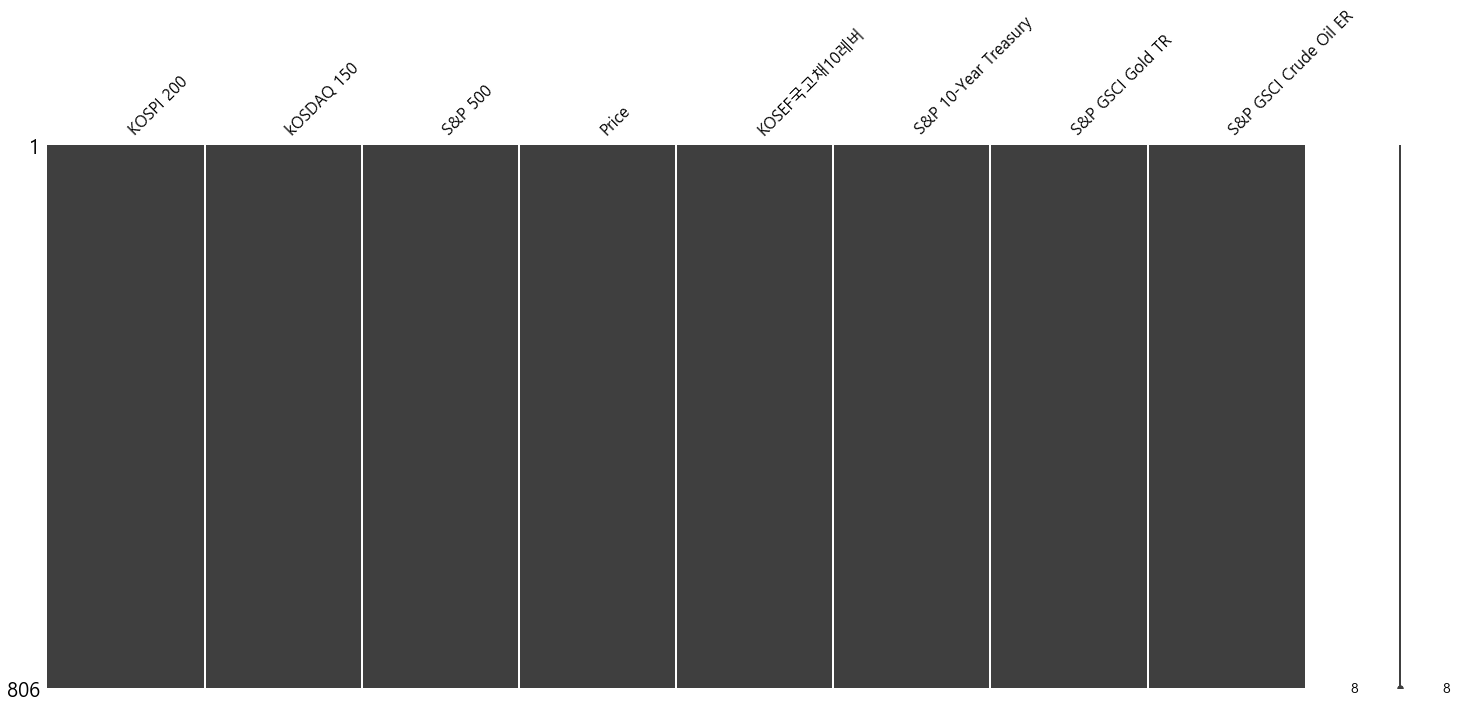

In [32]:
import missingno as msno

msno.matrix(port)
plt.show()

@엑셀로 저장

In [35]:
excel_writer = pd.ExcelWriter('../data/staticAllo.xlsx', engine='xlsxwriter')
port.to_excel(excel_writer, index=True)
excel_writer.save()

#@일단 그래프로 비교해 보자!!!

In [38]:
import seaborn as sns
sns.set()

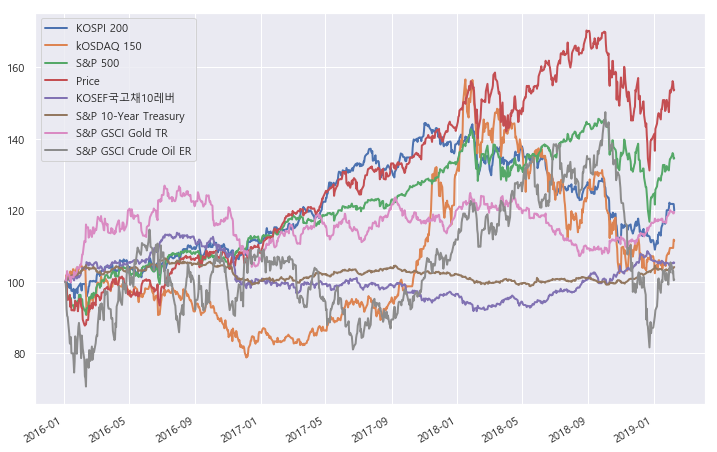

In [41]:
(port / port.iloc[0] * 100).plot(figsize=(12, 8), grid=True)

In [176]:
port_corr = port.pct_change().dropna().corr()

In [177]:
port_corr

,KOSPI 200,kOSDAQ 150,S&P 500,Price,KOSEF국고채10레버,S&P 10-Year Treasury,S&P GSCI Gold TR,S&P GSCI Crude Oil ER
KOSPI 200,1.000000,0.532452,0.209095,0.172424,0.048156,-0.130871,-0.079879,0.128744
kOSDAQ 150,0.532452,1.000000,0.176298,0.167491,0.020289,-0.059516,-0.023330,0.052367
S&P 500,0.209095,0.176298,1.000000,0.923544,-0.042527,-0.354272,-0.174083,0.339375
Price,0.172424,0.167491,0.923544,1.000000,-0.054665,-0.264671,-0.130928,0.232463
KOSEF국고채10레버,0.048156,0.020289,-0.042527,-0.054665,1.000000,-0.000716,0.018066,0.019960
S&P 10-Year Treasury,-0.130871,-0.059516,-0.354272,-0.264671,-0.000716,1.000000,0.403943,-0.240675
S&P GSCI Gold TR,-0.079879,-0.023330,-0.174083,-0.130928,0.018066,0.403943,1.000000,-0.006929
S&P GSCI Crude Oil ER,0.128744,0.052367,0.339375,0.232463,0.019960,-0.240675,-0.006929,1.000000


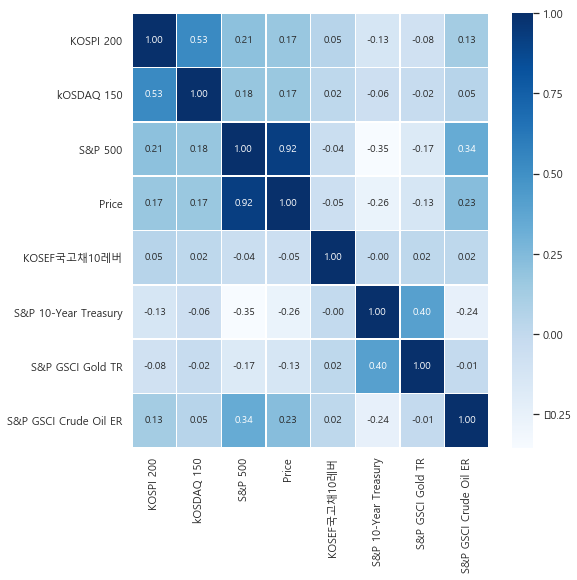

In [178]:
plt.figure(figsize=(8,8))
sns.heatmap(data= port_corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [187]:
rets = np.log(port / port.shift(1))     # 로그수익률 계산하기

In [188]:
rets.head()

,KOSPI 200,kOSDAQ 150,S&P 500,Price,KOSEF국고채10레버,S&P 10-Year Treasury,S&P GSCI Gold TR,S&P GSCI Crude Oil ER
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.006373,0.009957,0.002010,-0.003046,0.007728,0.000756,0.002977,-0.021683
2016-01-06,-0.006501,0.009859,-0.013202,-0.009005,-0.002790,0.004808,0.012447,-0.057208
2016-01-07,-0.011446,-0.009959,-0.023986,-0.031606,0.004075,0.001967,0.014471,-0.020839
2016-01-08,0.007517,0.010293,-0.010898,-0.008148,0.002598,0.002355,-0.008971,-0.003341


In [179]:
cum_ret = (port.pct_change()+1).cumprod()

In [182]:
cum_ret.loc[0:1,:] = 1

In [184]:
cum_ret.head()

,KOSPI 200,kOSDAQ 150,S&P 500,Price,KOSEF국고채10레버,S&P 10-Year Treasury,S&P GSCI Gold TR,S&P GSCI Crude Oil ER
2016-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-01-05,1.006393,1.010007,1.002012,0.996959,1.007757,1.000756,1.002981,0.978551
2016-01-06,0.999872,1.020014,0.988870,0.988021,1.004950,1.005579,1.015544,0.924141
2016-01-07,0.988493,1.009906,0.965434,0.957282,1.009053,1.007559,1.030346,0.905082
2016-01-08,0.995951,1.020354,0.954970,0.949514,1.011678,1.009935,1.021144,0.902063


In [185]:
#@title 포트폴리오의 평균수익률과 위험을 계산하는 함수 구성

def portresult(ret, w):
  crets = np.sum(rets.mean()*w)*12     # 평균수익률
  covmat = ret.cov()*12     # 공분산행렬
  cvol = np.sqrt(w.T @ covmat @ w)
  return crets, cvol

In [189]:
#@title w비중의 포트폴리오 수익과 위험 계산해보기

w = np.array([0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1])  
r, v = portresult(rets, w)

In [190]:
print("평균수익:", r)
print("위험:", v)

평균수익: 0.0020691144276383704
위험: 0.014316563301966225


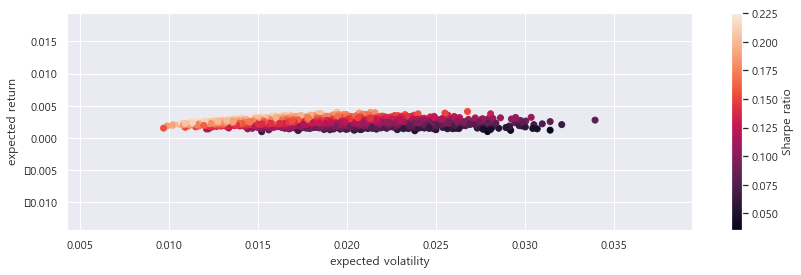

In [192]:
#@title 효율적 투자곡선 만들어보기

prets = []     # 리스트 형태로 수익을 쌓을 장소
pvols = []     # 리스트 형태로 위험(표준편차)을 쌓을 장소

for p in range (3000):     # 3000회 반복
    weights = np.random.random(8)   # 랜덤한 8개의 숫자를 생성함(8개의 자산에 대응하는..)
    weights /= np.sum(weights)     # 8개의 숫자의 합계가 1이 되도록 조정함(각 자산의 비중)
    r, v = portresult(rets, weights)
    
    prets.append(r)    # 계산된 포트폴리오 수익을 prets에 저장
    pvols.append(v) # 계산된 포트폴리오 위험을 pvols에 저장한다.
    
prets = np.array(prets)
pvols = np.array(pvols)

plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')
plt.show()

In [194]:
import scipy.optimize as sco

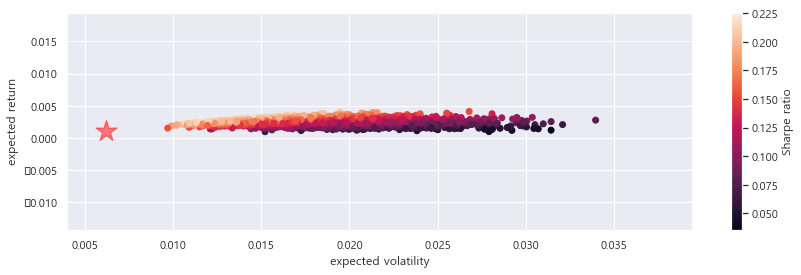

In [195]:
#@title 최소위험포트폴리오

def minvar(weights):     #최적화대상함수
    covmat = rets.cov()*12     # 공분산행렬
    return np.sqrt(weights.T @ covmat @ weights)
  
w = np.array([0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1])        #최초입력값(추측치)
method='SLSQP'     #최적화방법
bnds = ((0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1), (0,1))     #변수범위
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})     # 제약조건

opt = sco.minimize(minvar, w, method='SLSQP', bounds=bnds, constraints=cons)     #최적화

orets, ovol = portresult(rets, opt.x)

# 그래프 그리기

plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

plt.scatter(ovol, orets, marker="*", s=500, alpha=0.5, c = "red")

KOSPI 200                1.428571e-01
kOSDAQ 150               1.428571e-01
S&P 500                  1.428571e-01
Price                    1.428571e-01
KOSEF국고채10레버             1.428572e-01
S&P 10-Year Treasury    -2.574515e-19
S&P GSCI Gold TR         1.428571e-01
S&P GSCI Crude Oil ER    1.428571e-01
dtype: float64


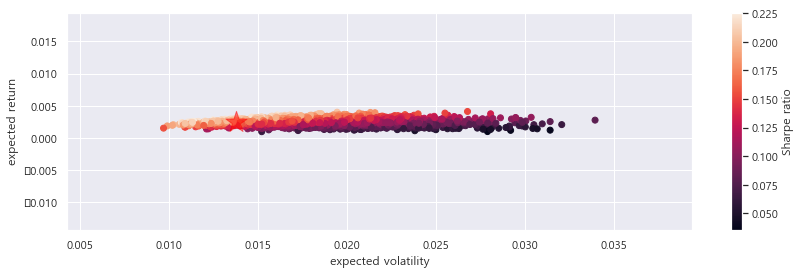

In [196]:
#@title 동일위험포트포리오
w = np.array([0.1, 0.1, 0.1, 0.1, 0.2, 0.2, 0.1, 0.1])     # 자산비중 set
covmat = rets.cov() * 12     # cov matrix 만들기
VarianceMatrix = covmat.multiply(w, axis = 1).multiply(w, axis = 0)  

def RiskParity(w):     # 최적화대상함수
    VarianceMatrix = covmat.multiply(w, axis = 1).multiply(w, axis = 0) 
    RCratio = VarianceMatrix.sum() / VarianceMatrix.sum().sum()
    return np.sum((0.25-np.array(RCratio))**2)


option = {'maxiter': 1000, 'ftol': 1e-60}     # ftol은 거의 0에 가까운 목표값, maxiter는 최대반복횟수
opt = sco.minimize(RiskParity, w, method='SLSQP', bounds=bnds, constraints=cons, options = option)

VarianceMatrix = covmat.multiply(opt.x, axis = 1).multiply(opt.x, axis = 0)  
RCratio = VarianceMatrix.sum() / VarianceMatrix.sum().sum()

print(RCratio)     # 위험비중 출력

orets, ovol = portresult(rets, opt.x)

# 그래프 그리기

plt.scatter(pvols, prets, c=prets/pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

plt.scatter(ovol, orets, marker="*", s=500, alpha=0.5, color = "red")